In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.9 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 5.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
from numpy import cov
from math import sqrt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!pip install opencv-python
import cv2

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 60.3 MB 331 kB/s eta 0:00:01     |█████████████████████████▊      | 48.4 MB 3.2 MB/s eta 0:00:04
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
np.set_printoptions(precision=3, suppress=True)

In [7]:
img=plt.imread('../../img/ima_perrito.jpeg')

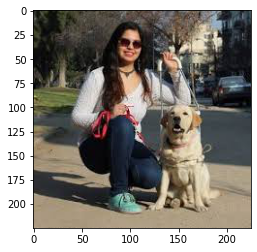

In [8]:
plt.imshow(img)
plt.show()

In [9]:
img

array([[[ 40,  42,  37],
        [ 48,  50,  45],
        [ 54,  56,  51],
        ...,
        [ 35,  50,  53],
        [ 61,  76,  79],
        [ 69,  83,  92]],

       [[ 44,  46,  41],
        [ 47,  49,  44],
        [ 49,  51,  46],
        ...,
        [ 44,  59,  62],
        [ 69,  84,  87],
        [ 68,  82,  91]],

       [[ 48,  50,  45],
        [ 46,  48,  43],
        [ 45,  47,  42],
        ...,
        [ 47,  62,  67],
        [ 66,  84,  88],
        [ 68,  82,  91]],

       ...,

       [[176, 158, 134],
        [175, 157, 133],
        [174, 156, 132],
        ...,
        [171, 155, 130],
        [170, 154, 129],
        [160, 144, 119]],

       [[177, 159, 135],
        [176, 158, 134],
        [175, 157, 133],
        ...,
        [173, 157, 132],
        [176, 160, 135],
        [181, 165, 140]],

       [[172, 154, 130],
        [177, 159, 135],
        [172, 154, 130],
        ...,
        [165, 149, 124],
        [166, 150, 125],
        [168, 150, 126]]

In [10]:
img.shape

(225, 225, 3)

In [11]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

In [12]:
b.shape

(225, 225)

In [13]:
g.shape

(225, 225)

In [14]:
r.shape

(225, 225)

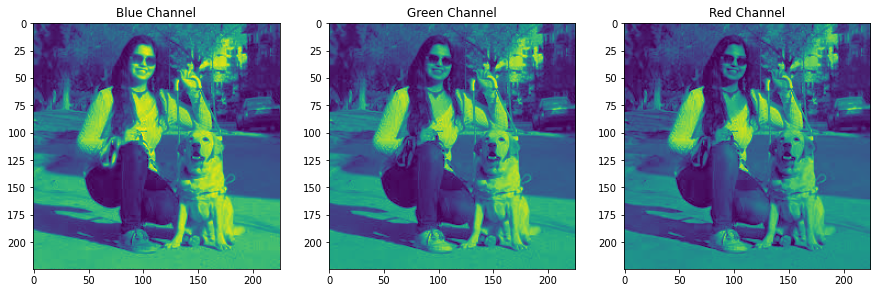

In [43]:
#Splitting into channels
#blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(b)
plt.savefig('../../img/blue_1.png')
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(g)
plt.savefig('../../img/green_1.png')
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(r)
plt.savefig('../../img/red_1.png')
plt.show()

In [17]:
b.shape

(225, 225)

In [18]:
df_blue = b/255
df_green = g/255
df_red = r/255

In [19]:
df_blue.shape


(225, 225)

In [20]:
df_blue

array([[0.157, 0.188, 0.212, ..., 0.137, 0.239, 0.271],
       [0.173, 0.184, 0.192, ..., 0.173, 0.271, 0.267],
       [0.188, 0.18 , 0.176, ..., 0.184, 0.259, 0.267],
       ...,
       [0.69 , 0.686, 0.682, ..., 0.671, 0.667, 0.627],
       [0.694, 0.69 , 0.686, ..., 0.678, 0.69 , 0.71 ],
       [0.675, 0.694, 0.675, ..., 0.647, 0.651, 0.659]])

In [21]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [22]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(225, 50)
(225, 50)
(225, 50)


In [23]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9863208731727618
Green Channel: 0.9834561245870328
Red Channel  : 0.9787963882741155


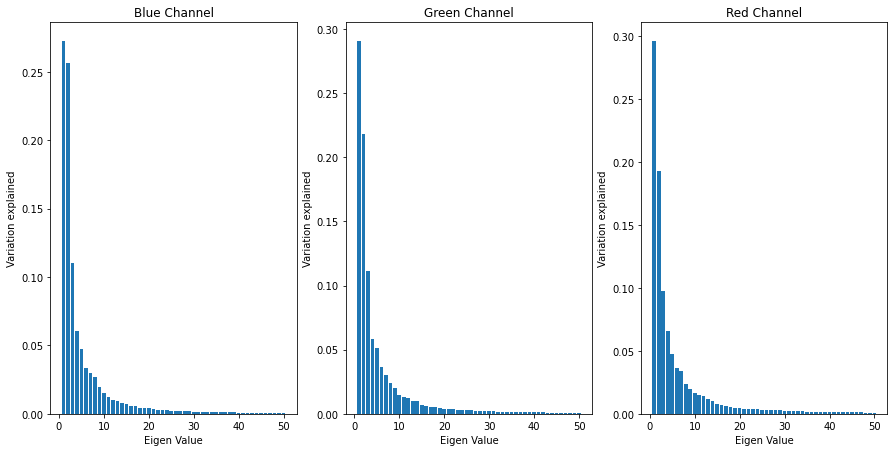

In [44]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.savefig('../../img/var_exp_can1.png')
plt.show()
#plt.savefig('../../img/var_exp_can1.png')

In [25]:
data_red =  np.dot(df_red - pca_r.mean_, pca_r.components_.T)

In [26]:
data_red

array([[-0.612, -0.393,  0.948, ...,  0.11 , -0.032, -0.072],
       [-0.738, -0.505,  0.81 , ...,  0.05 , -0.077, -0.026],
       [-0.7  , -0.539,  0.973, ...,  0.087, -0.084, -0.013],
       ...,
       [ 1.54 ,  2.151,  0.286, ...,  0.007, -0.012, -0.008],
       [ 1.591,  2.157,  0.291, ...,  0.01 , -0.001,  0.001],
       [ 1.576,  2.143,  0.287, ..., -0.003,  0.007,  0.019]])

In [27]:
trans_pca_r

array([[-0.612, -0.393,  0.948, ...,  0.11 , -0.032, -0.072],
       [-0.738, -0.505,  0.81 , ...,  0.05 , -0.077, -0.026],
       [-0.7  , -0.539,  0.973, ...,  0.087, -0.084, -0.013],
       ...,
       [ 1.54 ,  2.151,  0.286, ...,  0.007, -0.012, -0.008],
       [ 1.591,  2.157,  0.291, ...,  0.01 , -0.001,  0.001],
       [ 1.576,  2.143,  0.287, ..., -0.003,  0.007,  0.019]])

In [28]:
dat_inv_trans = np.dot(data_red, pca_r.components_) + pca_r.mean_

In [29]:
dat_inv_trans

array([[0.18 , 0.17 , 0.167, ..., 0.203, 0.285, 0.306],
       [0.19 , 0.161, 0.147, ..., 0.212, 0.294, 0.311],
       [0.223, 0.173, 0.155, ..., 0.249, 0.327, 0.342],
       ...,
       [0.505, 0.514, 0.516, ..., 0.508, 0.509, 0.508],
       [0.51 , 0.517, 0.519, ..., 0.515, 0.517, 0.517],
       [0.502, 0.508, 0.517, ..., 0.511, 0.509, 0.507]])

In [30]:
pca_r.inverse_transform(trans_pca_r)

array([[0.18 , 0.17 , 0.167, ..., 0.203, 0.285, 0.306],
       [0.19 , 0.161, 0.147, ..., 0.212, 0.294, 0.311],
       [0.223, 0.173, 0.155, ..., 0.249, 0.327, 0.342],
       ...,
       [0.505, 0.514, 0.516, ..., 0.508, 0.509, 0.508],
       [0.51 , 0.517, 0.519, ..., 0.515, 0.517, 0.517],
       [0.502, 0.508, 0.517, ..., 0.511, 0.509, 0.507]])

In [31]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(225, 225) (225, 225) (225, 225)


In [32]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(225, 225, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


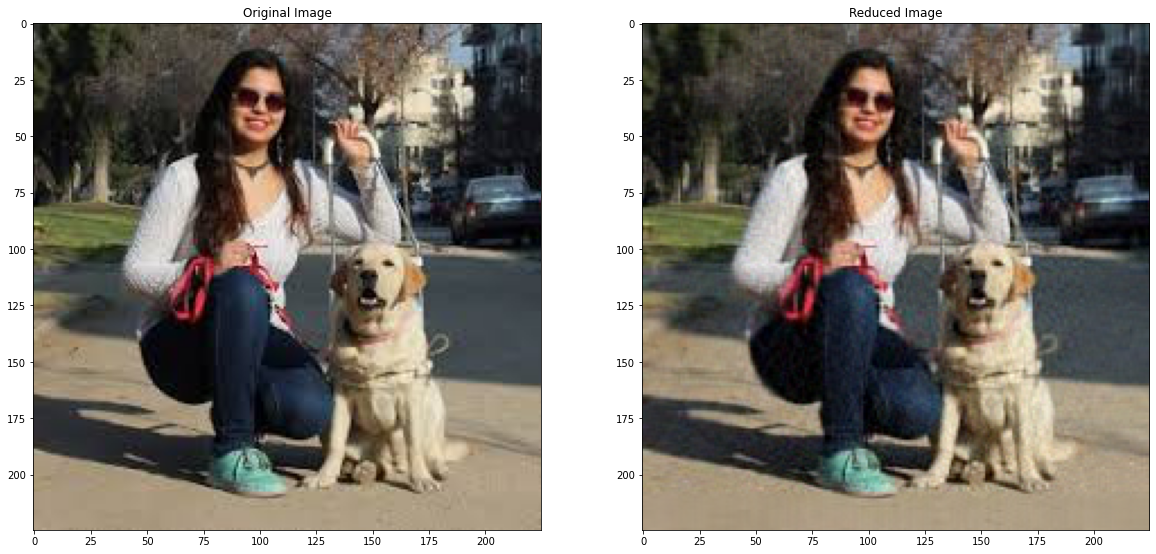

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize = (20, 10)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()
plt.savefig('../../img/img_red1.png')

# Se realizo actualizacion a la funcion jacobi_iteration para que regresara tanto los eValues como los eVectors ordenados de forma descendente esto hace que nuestra funcion returnPCA se comporte como lo hace la funcion de Skitlearn para PCA decomposition

In [35]:
# función de signo
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >= 0:
        return 1
    else:
        return -1
    

# función que calcula entradas de matriz de rotación Jacobi
def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1, idx2]) > np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1]) / (2 * Ak[idx1, idx2])
        t_star = sign(tau) / (np.abs(tau) + np.sqrt(1 + tau ** 2))
        c = 1 / np.sqrt(1 + t_star ** 2)
        s = c * t_star
    else:  # no rotation is performed
        c = 1
        s = 0

    return (c, s)


# función que calcula matriz de rotación Jacobi
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J


def off(A):
    """
        Find the quantity "off(A)" Frobenius norm of 𝐴 without the diagonal..
        Args:
            A (numpy ndarray): Matrix to calculate "off(A)".
        Returns:
            scalar value(float): value of function off(A).
        """
    A_k = A[~np.eye(A.shape[0], dtype=bool)].reshape(A.shape[0], -1)

    return np.linalg.norm(A_k, 'fro')


def max_sweeps(n):
    """
            Find the maximum number of sweeps to iterate in Jacobi's rotation algorithm.
            Args:
                n (int value): It corresponds to the maximum number of entries
            in the matrix that form the upper triangular part of 𝐴 without
            counting the diagonal that are assumed to be different from zero..
            Returns:
                max_sweeps(Int): Maximum number of sweeps.
    """
    max_sw = (n * (n - 1)) / 2

    return max_sw

def jacobi_iteration(a, tol=1.0e-8):
    """
            Jacobi rotations function for symmetric matrices with repeated elimination
            Args:
                a (numpy ndarray): Matrix to compute Jacobi rotation.
                tol (float): a small, positive amount (commonly less than or equal to 10−8).
            Returns:
                a_k (numpy ndarray): vector with eigenvalues of A.
                q_k (numpy ndarray): Matrix with eigenvectors of A.
    """

    # Realizamos una copia de A = A_k
    a_k = a.copy()

    # se define numero de dimension n basado en columnas
    # las entradas totales del triangulo superiores de A
    n = a_k.shape[1]

    # Definimos matriz identidad de x que generara vectores
    q_k = np.identity(n)

    # iniciamos contador de sweeps
    sweeps = 1
    # se calcula el valor maximo de sweeps
    max_sw = max_sweeps(n)

    # se calcula el Off inicial
    off_val = off(a_k)
    # se calcula tolerancia inicial
    tolerancia = tol * np.linalg.norm(a_k, 'fro')

    # se extraen los indices del triangulo sup de x
    tri_sup = np.triu_indices(n, 1)

    # se unen los indices en un solo array para hacer el loop de entradas de rotacion
    index_tri = np.column_stack((tri_sup[0], tri_sup[1]))

    print("Max_Sweeps {}".format(max_sw))
    print("------------------------\n\n")

    while off_val > tolerancia and sweeps < max_sw:

        print("Sweeps {}".format(sweeps))
        print("------------------------")

        for i in index_tri:
            # print("idx_1 = {}".format(i[0]))
            # print("idx_2 = {}".format(i[1]))

            j = compute_Jacobi_rotation(a_k, i[0], i[1])
            a_k = j.T @ a_k @ j
            q_k = q_k @ j

        # Se calcula nueva off y se imprime
        off_val = off(a_k)
        print("Off(x_k) = {}".format(off_val))
        # se calcula nueva tolerancia y se imprime
        tolerancia = tol * np.linalg.norm(a_k, 'fro')
        print("tolerancia = {}\n".format(tolerancia))

        print("La transformación de x_k queda como:")
        print(a_k)
        print("\nLa matriz q_k queda como:")
        print(q_k)
        print("------------------------\n\n")

        sweeps += 1
        
        
    # actualizacion del metodo para ordenar los eigenvectores 
    # de forma ascendente de acuerdo a su eigenvalor
    
    # se extraen los valores de la diagonal que en este caso son
    # los eigenvalues
    eValues = np.diag(a_k)
    
    # con esta funcion se extraen los indices
    #  ordenados de forma descendente de los evalues
    sort_eval = eValues.argsort()[::-1]
    
    # se ordenan los eigenvalues de forma descendente
    # y se asigna a_k
    a_k = eValues[sort_eval]

    # utilizando los indices del ordenamiento de los eValues
    # ordenamos la matriz q_k por las columnas y la asignamos de nuevo a q_k
    # con esto se ordena de manera descendente la matriz q_k de acuerdo 
    # a sus evalues a_k
    q_k = q_k[:,sort_eval]
    
    
    return a_k, q_k



def returnPCA(x, method):
    """
                Return PCA function to calculate the principal components of a matrix
                Args:
                    x (numpy ndarray): Matrix to compute PCA
                    method (str): string that indicates the method to be used for the
                                  approximation of eigenvalues and eigenvectors,
                                  "jacobi" for the jacobi_iteration method or "linalg" for the numpy method
                Returns:
                    x_k (numpy ndarray): vector with eigenvalues of x
                    q_k (numpy ndarray): Matrix with components of x
                    pca (numpy ndarray): Matrix with principal components scores of x
    """

    # se centra x
    x_c = x - x.mean(axis=0)

    # se calcula la covarianza de la matriz centrada transpuesta x_c.T que resulta en v
    v = np.cov(x_c.T)
    # se inicializan las variables a retornar
    x_k = np.empty(x_c.shape)
    q_k = np.empty(x_c.shape)

    # se calculan los eigenvalores y eigen vectores se puede utilizar
    # el metodo de jacobi_iteration o linalg de numpy
    if method == "jacobi":
        x_k, q_k = jacobi_iteration(v, tol=1.0e-8)
    elif method == "linalg":
        x_k, q_k = np.linalg.eig(v)
    else:
        print("no method found")

    # Obtenemos los Scores Componentes Principales de x al multiplicar .dot q_k.T por x_c.T centrada .
    pca = q_k.T.dot(x_c.T)
    # retorna pca.T
    return x_k, q_k, pca.T

In [36]:
pca_b2 = PCA()
pca_b2.fit(df_blue)
trans_pca_b2 = pca_b2.transform(df_blue)

In [37]:
eValues, comp, s_comp = returnPCA(df_blue, "jacobi")

Max_Sweeps 25200.0
------------------------


Sweeps 1
------------------------


KeyboardInterrupt: 

In [75]:
eValues

array([3.668, 3.449, 1.488, 0.815, 0.634, 0.454, 0.404, 0.361, 0.268,
       0.208, 0.166, 0.136, 0.131, 0.103, 0.095, 0.081, 0.073, 0.059,
       0.054, 0.053, 0.043, 0.042, 0.037, 0.034, 0.031, 0.03 , 0.029,
       0.026, 0.024, 0.021, 0.02 , 0.019, 0.018, 0.017, 0.016, 0.016,
       0.015, 0.015, 0.014, 0.012, 0.012, 0.012, 0.011, 0.011, 0.01 ,
       0.009, 0.009, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007,
       0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [76]:
comp

array([[-0.003, -0.072,  0.103, ...,  0.042, -0.059,  0.052],
       [-0.004, -0.072,  0.106, ..., -0.129,  0.121, -0.028],
       [-0.006, -0.076,  0.107, ...,  0.133, -0.05 ,  0.017],
       ...,
       [-0.037, -0.12 , -0.043, ..., -0.077, -0.017,  0.22 ],
       [-0.037, -0.117, -0.046, ...,  0.034,  0.039, -0.123],
       [-0.037, -0.115, -0.05 , ...,  0.023, -0.003,  0.023]])

In [77]:
s_comp

array([[-0.01 ,  0.918, -0.899, ..., -0.   ,  0.   ,  0.   ],
       [-0.122,  1.067, -0.767, ...,  0.   , -0.   , -0.   ],
       [-0.054,  1.112, -0.91 , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.983, -3.775, -0.281, ...,  0.   , -0.   , -0.   ],
       [ 1.987, -3.786, -0.282, ...,  0.   ,  0.   ,  0.   ],
       [ 2.   , -3.776, -0.273, ...,  0.   ,  0.   ,  0.   ]])

In [85]:
trans_pca_b2

array([[-0.01 , -0.918, -0.899, ..., -0.   ,  0.   ,  0.   ],
       [-0.122, -1.067, -0.767, ..., -0.   ,  0.   ,  0.   ],
       [-0.054, -1.112, -0.91 , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.983,  3.775, -0.281, ...,  0.   ,  0.   , -0.   ],
       [ 1.987,  3.786, -0.282, ...,  0.   , -0.   ,  0.   ],
       [ 2.   ,  3.776, -0.273, ...,  0.   , -0.   , -0.   ]])

In [129]:
comp[:,:50]

array([[-0.003, -0.072,  0.103, ...,  0.033,  0.033, -0.047],
       [-0.004, -0.072,  0.106, ...,  0.012,  0.007, -0.077],
       [-0.006, -0.076,  0.107, ...,  0.094,  0.063, -0.056],
       ...,
       [-0.037, -0.12 , -0.043, ...,  0.022,  0.018, -0.076],
       [-0.037, -0.117, -0.046, ...,  0.03 ,  0.014, -0.075],
       [-0.037, -0.115, -0.05 , ..., -0.015, -0.035, -0.042]])

In [130]:
pca_b2.components_.T[:,:50]

array([[-0.003,  0.072,  0.103, ...,  0.033, -0.033, -0.047],
       [-0.004,  0.072,  0.106, ...,  0.012, -0.007, -0.077],
       [-0.006,  0.076,  0.107, ...,  0.094, -0.063, -0.056],
       ...,
       [-0.037,  0.12 , -0.043, ...,  0.022, -0.018, -0.076],
       [-0.037,  0.117, -0.046, ...,  0.03 , -0.014, -0.075],
       [-0.037,  0.115, -0.05 , ..., -0.015,  0.035, -0.042]])

In [88]:
pca_b2.components_.shape

(225, 225)

In [89]:
total_evalues = sum(eValues)

In [90]:
total_evalues

13.460377173004913

In [ ]:
13.460377173004915

In [91]:
eValues

array([3.668, 3.449, 1.488, 0.815, 0.634, 0.454, 0.404, 0.361, 0.268,
       0.208, 0.166, 0.136, 0.131, 0.103, 0.095, 0.081, 0.073, 0.059,
       0.054, 0.053, 0.043, 0.042, 0.037, 0.034, 0.031, 0.03 , 0.029,
       0.026, 0.024, 0.021, 0.02 , 0.019, 0.018, 0.017, 0.016, 0.016,
       0.015, 0.015, 0.014, 0.012, 0.012, 0.012, 0.011, 0.011, 0.01 ,
       0.009, 0.009, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007,
       0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [93]:
v_e = [(i/total_evalues) for i in eValues]

In [94]:
v_e

[0.27247560195645437,
 0.2562628337493643,
 0.11056112860564207,
 0.06056056814554364,
 0.04711457492601153,
 0.0337445353193319,
 0.02998137988675016,
 0.026838246192617658,
 0.01987944297639895,
 0.015434632540431474,
 0.012327360714480626,
 0.010099268125361917,
 0.009719157603489886,
 0.007623557884919656,
 0.007032161826285914,
 0.0060040213202662346,
 0.005449260733712586,
 0.004395085373378035,
 0.00400024028183582,
 0.003910646801683217,
 0.00321948286254732,
 0.0031004489568608943,
 0.002742781352378689,
 0.002510059082927855,
 0.0022794523238769257,
 0.00221396738439788,
 0.0021184741740081464,
 0.0019472998385322066,
 0.0017596978736043785,
 0.0015481265888457189,
 0.0015025680907168044,
 0.001388712387758732,
 0.0013599005772414988,
 0.0012911163796307634,
 0.0012041744607996683,
 0.0011687465249790282,
 0.0011471660388698468,
 0.0011199552021812266,
 0.0010186610434733373,
 0.0009154589910229968,
 0.0008877346056466515,
 0.0008559765061644867,
 0.0008228679137340415,
 0.00

In [137]:
sorted(xk_b, reverse=True)

[3.6676243727754314,
 3.4493943976894963,
 1.4881944917050451,
 0.8151680890504841,
 0.6341799488499152,
 0.45421417292599314,
 0.40356068144280044,
 0.3612529164145967,
 0.26758480045157323,
 0.20775597552094263,
 0.16593092476459256,
 0.13593995813867765,
 0.1308235271468524,
 0.10261596453125416,
 0.09465555052341545,
 0.08081639152554644,
 0.0733491047898169,
 0.05915950683322548,
 0.053844742976157614,
 0.05263878094106144,
 0.04333545363191246,
 0.041733212364997274,
 0.036918871506101646,
 0.033786341982735744,
 0.030682288027265973,
 0.029800836042726618,
 0.028515461413419693,
 0.026211390295575066,
 0.02368619708924966,
 0.020838367797420876,
 0.02022513322917005,
 0.018692592524056785,
 0.018304774687457673,
 0.017378913444074672,
 0.016208642424463356,
 0.015731769045856527,
 0.015441287563250153,
 0.015075019438228286,
 0.013711561856597873,
 0.012322423305588056,
 0.011949242621532706,
 0.011521766624204956,
 0.011076112482423867,
 0.010738717194634869,
 0.010469720172165

In [68]:
var_exp = [(i/total_evalues) for i in sorted(xk_b, reverse=True)]

In [70]:
var_exp

[0.27247560195645437,
 0.25626283374936426,
 0.11056112860564206,
 0.060560568145543635,
 0.047114574926011524,
 0.03374453531933189,
 0.029981379886750155,
 0.026838246192617654,
 0.019879442976398945,
 0.01543463254043147,
 0.012327360714480625,
 0.010099268125361915,
 0.009719157603489884,
 0.007623557884919655,
 0.007032161826285913,
 0.006004021320266234,
 0.0054492607337125855,
 0.004395085373378035,
 0.00400024028183582,
 0.003910646801683216,
 0.0032194828625473197,
 0.003100448956860894,
 0.0027427813523786884,
 0.0025100590829278545,
 0.0022794523238769252,
 0.0022139673843978797,
 0.0021184741740081464,
 0.0019472998385322063,
 0.001759697873604378,
 0.0015481265888457186,
 0.0015025680907168042,
 0.0013887123877587319,
 0.0013599005772414986,
 0.0012911163796307632,
 0.0012041744607996683,
 0.001168746524979028,
 0.0011471660388698466,
 0.0011199552021812266,
 0.001018661043473337,
 0.0009154589910229967,
 0.0008877346056466514,
 0.0008559765061644866,
 0.000822867913734041

In [69]:
cum_sum_exp = np.cumsum(var_exp)

In [71]:
cum_sum_exp

array([0.272, 0.529, 0.639, 0.7  , 0.747, 0.781, 0.811, 0.838, 0.857,
       0.873, 0.885, 0.895, 0.905, 0.913, 0.92 , 0.926, 0.931, 0.936,
       0.94 , 0.943, 0.947, 0.95 , 0.952, 0.955, 0.957, 0.959, 0.962,
       0.964, 0.965, 0.967, 0.968, 0.97 , 0.971, 0.972, 0.974, 0.975,
       0.976, 0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.982, 0.983,
       0.984, 0.985, 0.985, 0.986, 0.986, 0.987, 0.987, 0.988, 0.988,
       0.989, 0.989, 0.99 , 0.99 , 0.991, 0.991, 0.991, 0.992, 0.992,
       0.992, 0.993, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994,
       0.995, 0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996,
       0.996, 0.996, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997,
       0.997, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
       0.998, 0.998, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 1.   ,

In [97]:
pca_b3 = PCA(n_components=50)
pca_b3.fit(df_blue)
trans_pca_b3 = pca_b3.transform(df_blue)

In [98]:
trans_pca_b3.shape

(225, 50)

In [99]:
trans_pca_b3

array([[-0.01 , -0.918, -0.899, ...,  0.02 ,  0.008, -0.135],
       [-0.122, -1.067, -0.767, ...,  0.045,  0.036, -0.087],
       [-0.054, -1.112, -0.91 , ..., -0.102,  0.034, -0.022],
       ...,
       [ 1.983,  3.775, -0.281, ..., -0.012,  0.01 , -0.011],
       [ 1.987,  3.786, -0.282, ..., -0.012,  0.013, -0.015],
       [ 2.   ,  3.776, -0.273, ...,  0.   , -0.005,  0.016]])

In [101]:
s_comp[:,:50]

array([[-0.01 ,  0.918, -0.899, ...,  0.02 , -0.008, -0.135],
       [-0.122,  1.067, -0.767, ...,  0.045, -0.036, -0.087],
       [-0.054,  1.112, -0.91 , ..., -0.102, -0.034, -0.022],
       ...,
       [ 1.983, -3.775, -0.281, ..., -0.012, -0.01 , -0.011],
       [ 1.987, -3.786, -0.282, ..., -0.012, -0.013, -0.015],
       [ 2.   , -3.776, -0.273, ...,  0.   ,  0.005,  0.016]])

In [107]:
df_transform = pd.DataFrame(list(zip(s_comp[:1,:50][0],trans_pca_b3[:1,:][0])), columns=['s_comp', 'trans_pca_b3'])

In [108]:
df_transform.head(10)

,s_comp,trans_pca_b3
0,-0.010447,-0.010447
1,0.918103,-0.918103
2,-0.899354,-0.899354
3,-0.036967,-0.036967
4,-0.133879,0.133879
5,-0.209672,0.209672
6,-0.699742,-0.699742
7,-0.007037,-0.007037
8,0.929804,-0.929804
9,0.049228,0.049228


In [110]:
df_transform.tail(10)

,s_comp,trans_pca_b3
40,-0.155328,0.155328
41,0.143246,-0.143246
42,-0.248488,0.248488
43,0.010967,-0.010967
44,-0.170876,-0.170876
45,-0.022242,0.022242
46,-0.069046,0.069046
47,0.020046,0.020046
48,-0.007956,0.007956
49,-0.134923,-0.134923


Calculo de la inversa transform

In [111]:
pca_b3.inverse_transform(trans_pca_b3)

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

In [115]:
np.dot(pca_b3.components_, trans_pca_b3)

array([[ 13.422, -14.492,   6.077, ...,   0.034,   0.009,   0.045],
       [ -2.887,   4.562,  -4.38 , ...,  -0.026,   0.017,  -0.03 ],
       [ -7.984,  -9.615,   2.06 , ...,  -0.1  ,  -0.038,   0.02 ],
       ...,
       [  0.722,   1.582,   0.07 , ...,  -0.113,  -0.047,   0.077],
       [  0.022,  -0.403,  -0.238, ...,  -0.067,  -0.094,  -0.002],
       [ -0.398,  -1.056,  -0.389, ...,  -0.027,   0.081,   0.074]])

In [120]:
pca_b3.mean_

array([0.378, 0.378, 0.371, 0.364, 0.362, 0.364, 0.362, 0.359, 0.347,
       0.342, 0.333, 0.329, 0.33 , 0.331, 0.329, 0.323, 0.326, 0.311,
       0.322, 0.328, 0.328, 0.315, 0.317, 0.322, 0.326, 0.335, 0.339,
       0.356, 0.374, 0.38 , 0.389, 0.395, 0.385, 0.364, 0.344, 0.343,
       0.345, 0.343, 0.348, 0.358, 0.365, 0.375, 0.38 , 0.385, 0.397,
       0.407, 0.416, 0.414, 0.397, 0.393, 0.387, 0.382, 0.389, 0.391,
       0.389, 0.389, 0.392, 0.399, 0.4  , 0.395, 0.398, 0.402, 0.398,
       0.395, 0.398, 0.404, 0.409, 0.403, 0.383, 0.358, 0.341, 0.32 ,
       0.303, 0.273, 0.253, 0.239, 0.232, 0.239, 0.221, 0.202, 0.174,
       0.19 , 0.195, 0.204, 0.221, 0.217, 0.226, 0.239, 0.251, 0.259,
       0.301, 0.338, 0.361, 0.374, 0.402, 0.424, 0.44 , 0.442, 0.444,
       0.46 , 0.488, 0.496, 0.498, 0.486, 0.461, 0.475, 0.483, 0.47 ,
       0.465, 0.458, 0.423, 0.376, 0.339, 0.328, 0.306, 0.301, 0.306,
       0.306, 0.315, 0.318, 0.325, 0.32 , 0.321, 0.348, 0.389, 0.367,
       0.361, 0.372,

In [124]:
d_means = df_blue.mean(axis=0)

In [125]:
d_means

array([0.378, 0.378, 0.371, 0.364, 0.362, 0.364, 0.362, 0.359, 0.347,
       0.342, 0.333, 0.329, 0.33 , 0.331, 0.329, 0.323, 0.326, 0.311,
       0.322, 0.328, 0.328, 0.315, 0.317, 0.322, 0.326, 0.335, 0.339,
       0.356, 0.374, 0.38 , 0.389, 0.395, 0.385, 0.364, 0.344, 0.343,
       0.345, 0.343, 0.348, 0.358, 0.365, 0.375, 0.38 , 0.385, 0.397,
       0.407, 0.416, 0.414, 0.397, 0.393, 0.387, 0.382, 0.389, 0.391,
       0.389, 0.389, 0.392, 0.399, 0.4  , 0.395, 0.398, 0.402, 0.398,
       0.395, 0.398, 0.404, 0.409, 0.403, 0.383, 0.358, 0.341, 0.32 ,
       0.303, 0.273, 0.253, 0.239, 0.232, 0.239, 0.221, 0.202, 0.174,
       0.19 , 0.195, 0.204, 0.221, 0.217, 0.226, 0.239, 0.251, 0.259,
       0.301, 0.338, 0.361, 0.374, 0.402, 0.424, 0.44 , 0.442, 0.444,
       0.46 , 0.488, 0.496, 0.498, 0.486, 0.461, 0.475, 0.483, 0.47 ,
       0.465, 0.458, 0.423, 0.376, 0.339, 0.328, 0.306, 0.301, 0.306,
       0.306, 0.315, 0.318, 0.325, 0.32 , 0.321, 0.348, 0.389, 0.367,
       0.361, 0.372,

In [119]:
np.dot(trans_pca_b3, pca_b3.components_)+ pca_b3.mean_

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

In [128]:
np.dot(trans_pca_b3, pca_b3.components_)+d_means

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

# calcular inversa transpont de los 50 primeros componetes con nuestros resultados 

In [134]:
#forma manual con nuestros resultados
np.dot(s_comp[:,:50], comp[:,:50].T) + d_means 

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

In [135]:
#forma directa de skitlearn
pca_b3.inverse_transform(trans_pca_b3)

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

In [136]:
#forma manual con los resultados de skitlearn 
np.dot(trans_pca_b3, pca_b3.components_)+ pca_b3.mean_ 

array([[0.208, 0.187, 0.187, ..., 0.142, 0.214, 0.242],
       [0.216, 0.176, 0.164, ..., 0.152, 0.221, 0.245],
       [0.244, 0.189, 0.16 , ..., 0.166, 0.234, 0.26 ],
       ...,
       [0.675, 0.68 , 0.68 , ..., 0.666, 0.667, 0.667],
       [0.678, 0.68 , 0.681, ..., 0.671, 0.672, 0.673],
       [0.672, 0.674, 0.681, ..., 0.669, 0.668, 0.666]])

# pendiente hacer para canal verde y rojo

In [ ]:

xk_g, qk_g, pcaS_g = returnPCA(df_green, "jacobi")
xk_r, qk_r, pcaS_r = returnPCA(df_red, "jacobi")